In [1]:
#讀取雲端硬碟
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
#載入資料集
import pandas as pd
beer=pd.read_csv("/content/drive/MyDrive/機器學習人工智慧/第16章：聚类实例/聚类实例/聚类算法/data.txt",sep=' ')
beer

,name,calories,sodium,alcohol,cost
0,Budweiser,144,15,4.7,0.43
1,Schlitz,151,19,4.9,0.43
2,Lowenbrau,157,15,0.9,0.48
3,Kronenbourg,170,7,5.2,0.73
4,Heineken,152,11,5.0,0.77
5,Old_Milwaukee,145,23,4.6,0.28
6,Augsberger,175,24,5.5,0.40
7,Srohs_Bohemian_Style,149,27,4.7,0.42
8,Miller_Lite,99,10,4.3,0.43
9,Budweiser_Light,113,8,3.7,0.40


In [8]:
X=beer[["calories","sodium","alcohol","cost"]]

# Kmean分群

In [10]:
#KMean分群,先分2群和3群
from sklearn.cluster import KMeans
km=KMeans(n_clusters=3).fit(X)
km2=KMeans(n_clusters=2).fit(X)

In [12]:
beer['cluster']=km.labels_
beer['cluster2']=km2.labels_
beer.sort_values('cluster')

,name,calories,sodium,alcohol,cost,cluster,cluster2
0,Budweiser,144,15,4.7,0.43,0,0
1,Schlitz,151,19,4.9,0.43,0,0
2,Lowenbrau,157,15,0.9,0.48,0,0
3,Kronenbourg,170,7,5.2,0.73,0,0
4,Heineken,152,11,5.0,0.77,0,0
5,Old_Milwaukee,145,23,4.6,0.28,0,0
6,Augsberger,175,24,5.5,0.40,0,0
7,Srohs_Bohemian_Style,149,27,4.7,0.42,0,0
17,Heilemans_Old_Style,144,24,4.9,0.43,0,0
16,Hamms,139,19,4.4,0.43,0,0


In [14]:
from pandas.plotting import scatter_matrix
%matplotlib inline
cluster_centers=km.cluster_centers_
cluster_centers_2=km2.cluster_centers_
beer.groupby("cluster").mean()

,calories,sodium,alcohol,cost,cluster2
cluster,,,,,
0,150.00,17.0,4.521429,0.520714,0.0
1,102.75,10.0,4.075000,0.440000,1.0
2,70.00,10.5,2.600000,0.420000,1.0


In [16]:
centers=beer.groupby("cluster").mean().reset_index()
centers

,cluster,calories,sodium,alcohol,cost,cluster2
0,0,150.00,17.0,4.521429,0.520714,0.0
1,1,102.75,10.0,4.075000,0.440000,1.0
2,2,70.00,10.5,2.600000,0.420000,1.0


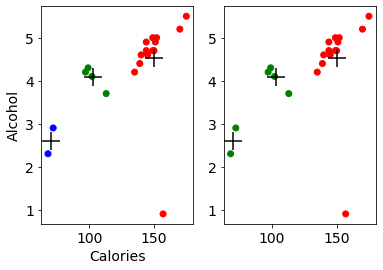

In [45]:
centers=beer.groupby("cluster").mean().reset_index()
import matplotlib.pyplot as plt
plt.rcParams['font.size']=14
import numpy as np
colors=np.array(['red','green','blue','yellow'])
plt.tight_layout()

#分三群的圖
plt.subplot(1, 2, 1)
plt.xlabel('Calories')
plt.ylabel('Alcohol')

plt.scatter(beer['calories'],beer['alcohol'],c=colors[beer['cluster']])
plt.scatter(centers.calories,centers.alcohol,linewidths=3,marker='+',s=300,c='black')

#分二群的圖
plt.subplot(1, 2, 2)
plt.scatter(beer['calories'],beer['alcohol'],c=colors[beer['cluster2']])
plt.scatter(centers.calories,centers.alcohol,linewidths=3,marker='+',s=300,c='black')

plt.show()

目視很難看出2群好還是3群好?

Text(0.5, 0.98, 'With 3 centroids initialized')

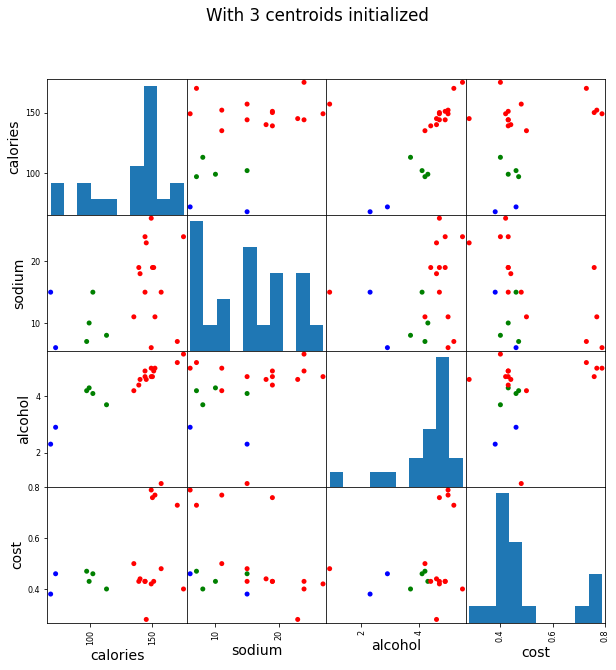

In [17]:
scatter_matrix(beer[['calories','sodium','alcohol','cost']],s=100,alpha=1,c=colors[beer['cluster']],figsize=(10,10))
plt.suptitle("With 3 centroids initialized")

Text(0.5, 0.98, 'With 2 centroids initialized')

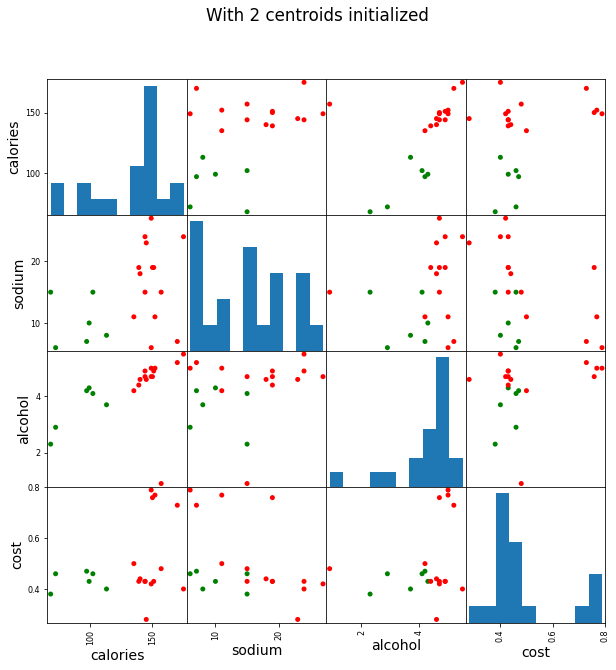

In [19]:
scatter_matrix(beer[['calories','sodium','alcohol','cost']],s=100,alpha=1,c=colors[beer['cluster2']],figsize=(10,10))
plt.suptitle("With 2 centroids initialized")

輪廓分析:分析並畫圖來了解分幾群好

In [22]:
#標準化數據
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.38791334,  0.00779468,  0.43380786, -0.45682969],
       [ 0.6250656 ,  0.63136906,  0.62241997, -0.45682969],
       [ 0.82833896,  0.00779468, -3.14982226, -0.10269815],
       [ 1.26876459, -1.23935408,  0.90533814,  1.66795955],
       [ 0.65894449, -0.6157797 ,  0.71672602,  1.95126478],
       [ 0.42179223,  1.25494344,  0.3395018 , -1.5192243 ],
       [ 1.43815906,  1.41083704,  1.1882563 , -0.66930861],
       [ 0.55730781,  1.87851782,  0.43380786, -0.52765599],
       [-1.1366369 , -0.7716733 ,  0.05658363, -0.45682969],
       [-0.66233238, -1.08346049, -0.5092527 , -0.66930861],
       [ 0.25239776,  0.47547547,  0.3395018 , -0.38600338],
       [-1.03500022,  0.00779468, -0.13202848, -0.24435076],
       [ 0.08300329, -0.6157797 , -0.03772242,  0.03895447],
       [ 0.59118671,  0.63136906,  0.43380786,  1.88043848],
       [ 0.55730781, -1.39524768,  0.71672602,  2.0929174 ],
       [-2.18688263,  0.00779468, -1.82953748, -0.81096123],
       [ 0.21851887,  0.

In [49]:
#常態分佈化的X導入模型
km = KMeans(n_clusters=3).fit(X_scaled)

In [50]:
beer["scaled_cluster"] = km.labels_
beer.sort_values("scaled_cluster")

,name,calories,sodium,alcohol,cost,cluster,cluster2,scaled_cluster,cluster_db
0,Budweiser,144,15,4.7,0.43,0,0,0,0
1,Schlitz,151,19,4.9,0.43,0,0,0,0
17,Heilemans_Old_Style,144,24,4.9,0.43,0,0,0,0
16,Hamms,139,19,4.4,0.43,0,0,0,0
5,Old_Milwaukee,145,23,4.6,0.28,0,0,0,0
6,Augsberger,175,24,5.5,0.40,0,0,0,0
7,Srohs_Bohemian_Style,149,27,4.7,0.42,0,0,0,0
10,Coors,140,18,4.6,0.44,0,0,0,0
15,Pabst_Extra_Light,68,15,2.3,0.38,2,1,1,1
12,Michelob_Light,135,11,4.2,0.50,0,0,1,0


0.1797806808940007 0.6731775046455796


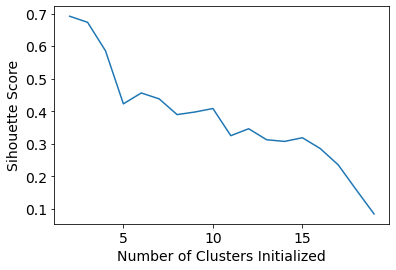

In [51]:
from sklearn import metrics
score_scaled=metrics.silhouette_score(X,beer.scaled_cluster)
score=metrics.silhouette_score(X,beer.cluster)
print(score_scaled, score)
#數值越接近1越好,由分數得知常態分佈化後分類效果較差,

scores=[]
for k in range(2,20):
    labels=KMeans(n_clusters=k).fit(X).labels_
    score=metrics.silhouette_score(X,labels,metric='euclidean')
    scores.append(score)
plt.plot(list(range(2,20)),scores)
plt.xlabel('Number of Clusters Initialized')
plt.ylabel('Sihouette Score')
plt.show()

#由圖看出,分2群的效果較好

# DBSCAN分群

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb55100cb90>,
      dtype=object)

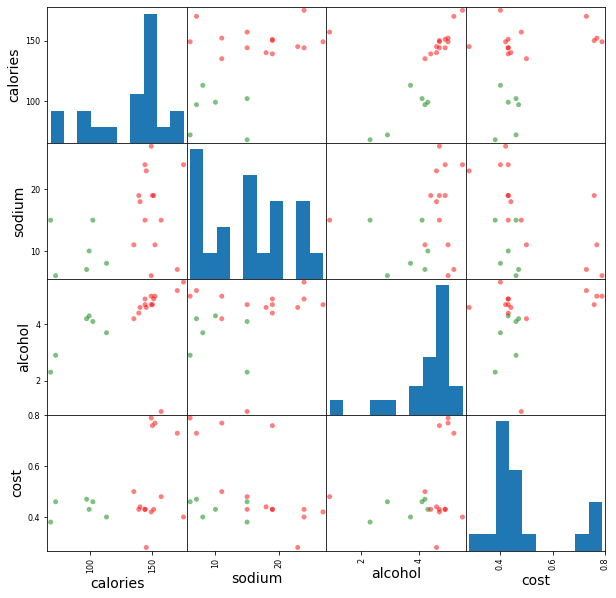

In [38]:
from sklearn.cluster import DBSCAN
db=DBSCAN(eps=4,min_samples=2).fit(X)
labels=db.labels_
beer['cluster_db']=lables
beer.sort_values('cluster_db')
beer.groupby('cluster_db').mean()
scatter_matrix(X,c=colors[beer.cluster_db],figsize=(10,10),s=100)

DBSCAN選擇半徑和是否做前處理,其出來的圖示結果不同

DBSCAN 優點:

1.   相比 K-means，DBSCAN 不需要預先聲明聚類數量。
2.   可以找出任何形狀的聚類，甚至能找出一個聚類，它包圍但不連接另一個聚類。
3.   能分辨雜訊
4.   只需兩個參數，且對資料庫內的點的次序幾乎不敏感。
5.   被設計成能配合可加速範圍訪問的資料庫結構，例如 R*樹。
6.   如果對資料有足夠的了解，可以選擇適當的參數以獲得最佳的分類。


DBSCAN 缺點:
1.    如果資料裡的分佈狀態有不同的密度，並且差異很大，DBSCAN 就沒有辦法提供一個好的聚類結果，因為你沒有辦法選擇出一個適用於所有聚類的 minPts & ε 參數組合。
2.    如果沒有對資料和比例的足夠理解，將很難選擇適合的 ε(半徑) 參數。
3.    DBSCAN 聚類分析的質素受函數 regionQuery(P,ε) 裡所使用的度量影響，最常用的度量是歐幾里得距離，尤其在高維度的資料中，會受到所謂「維數災難」的影響，很難找出一個合適的 ε 。不過其實在所有使用歐氏距離的演算法都會受維數災難所影響。

文字來源:
https://jason-chen-1992.weebly.com/home/-dbscan
